# Exercise 1 - Bayesian Classifier

In [1]:
import numpy as np

# number of class
N = 3

# size of the sample: N*n
# n is the number of point x_i generated for each class
n = 100

# dimension of the input space
d = 2

# we assume that if Y = 0, then X follow a normal distribution with mean (1,0) and variance I_2
# Generate the sample
x0 = np.random.randn(2,n)+np.array([[1],[0]])

# verifying if the mean and the covariance matrix are OK
print("estimated covariance matrix :\n",np.cov(x0),"\n")
print("estimated mean : \n",np.mean(x0[0,:]))
print(np.mean(x0[1,:]))

# we assume that if Y = 1, then X follow 
x1 = 0.8*np.random.randn(2,n)+np.array([[3],[2]])

# we ...
x2 = 1.5*np.random.randn(2,n)+np.array([[-1.5],[0.5]])

estimated covariance matrix :
 [[0.99691233 0.00850897]
 [0.00850897 1.19209747]] 

estimated mean : 
 0.9027186053156859
0.06637161150622212


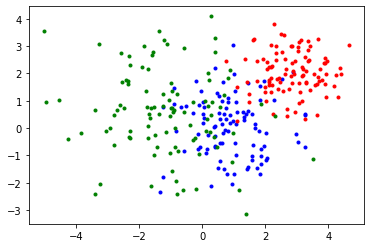

In [2]:
import matplotlib.pyplot as plt

# Plot the dataset !
# blue for class Y= 0, red for class Y = 1 and green for class Y = 2
plt.plot(x0[0,:],x0[1,:],"b.",x1[0,:],x1[1,:],"r.",x2[0,:],x2[1,:],"g.")
plt.show()

In [3]:
# in order to compute the boundaries of the Bayesian classifier
# we use some computer algebra system (here sympy) to determine
# the equations of theses boundaries
from sympy import *

# define the symbolic variables
x, y = symbols("x,y",real=True)

# define the gaussian distribution density
m1 = 0
s1 = 1
f = 1/(s1*sqrt(2*pi))*exp(-((x-m1)**2)/(2*s1*s1))
f

sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))

In [4]:
# Define the Law of X | Y = 0
s1 = 1
s2 = 1
m1 = 1
m2 = 0
f0 = 1/(s1*sqrt(2*pi))*exp(-((x-m1)**2)/(2*s1*s1)) *1/(s2*sqrt(2*pi))*exp(-((y-m2)**2)/(2*s2*s2))
f0

exp(-y**2/2)*exp(-(x - 1)**2/2)/(2*pi)

In [5]:
# Define the Law of X | Y = 1
s1 = 0.8
s2 = 0.8
m1 = 3
m2 = 2
f1 = 1/(s1*sqrt(2*pi))*exp(-((x-m1)**2)/(2*s1*s1)) *1/(s2*sqrt(2*pi))*exp(-((y-m2)**2)/(2*s2*s2))
f1

0.78125*exp(-0.78125*(x - 3)**2)*exp(-0.78125*(y - 2)**2)/pi

In [6]:
# Define the Law of X | Y = 2
s1 = 1.5
s2 = 1.5
m1 = -1.5
m2 = 0.5
f2 = 1/(s1*sqrt(2*pi))*exp(-((x-m1)**2)/(2*s1*s1)) *1/(s2*sqrt(2*pi))*exp(-((y-m2)**2)/(2*s2*s2))
f2

0.222222222222222*exp(-0.5*(0.666666666666667*x + 1)**2)*exp(-0.222222222222222*(y - 0.5)**2)/pi

In [7]:
# Law of Y = 0 | X = x
ly0 = f0 / (f0+f1 +f2)

# Law of Y = 1 | X = x
ly1 = f1 / (f0 + f1 + f2)

# Law of Y = 2 | X = x
ly2 = f2 / (f0 + f1 +f2)

In [8]:
# Compute the boundaries of the Bayesian classier with Sympy
sf1 = solve(f0-f1,y)
sf2 = solve(f1-f2,y)
sf3 = solve(f0-f2,y)

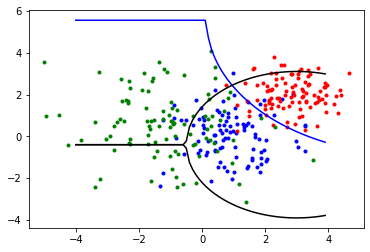

In [11]:
hx = np.arange(-4,4,0.1)
xb11 = [re(sf1[0]).subs(x,k) for k in hx]
xb12 = [re(sf1[1]).subs(x,k) for k in hx]
xb21 = [re(sf2[0]).subs(x,k) for k in hx]
xb22 = [re(sf2[1]).subs(x,k) for k in hx]
xb31 = [re(sf3[0]).subs(x,k) for k in hx]
xb32 = [re(sf3[1]).subs(x,k) for k in hx]

plt.plot(x0[0,:],x0[1,:],"b.",x1[0,:],x1[1,:],"r.",x2[0,:],x2[1,:],"g.",hx,xb11,"b",hx,xb31,"k",hx,xb32,"k")
plt.show()

In [12]:
# create the dataset 

# create the output vector
y0 = np.zeros(n)
y1 = np.ones(n)
y2 = 2*np.ones(n)
ys = np.concatenate((y0,y1,y2))
Xs = np.concatenate((x0,x1,x2),axis=1)
Xs = Xs.T


In [13]:
from sklearn.model_selection import train_test_split

# define a seed for the random number generator
SEED = 23

# Split the data to create the train set and the test set
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.2, random_state=SEED)
#

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
from sklearn.linear_model import LogisticRegression

# train a Logistic Regressor on this dataset
logreg_clf  = LogisticRegression()

model = logreg_clf.fit(X_train,y_train)

print("Score on training set :",model.score(X_train,y_train))

Score on training set : 0.8083333333333333


In [15]:
# Score on the test set
from sklearn.metrics import classification_report

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.69      0.69      0.69        16
         1.0       0.96      0.96      0.96        24
         2.0       0.80      0.80      0.80        20

    accuracy                           0.83        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.83      0.83      0.83        60



In [16]:
# Compute the score of the bayesian classifier on the test set

# define a function that return the classification according to the Bayesian classifier
def BayesianClassif(X):
    xi = X[0]
    yi = X[1]
    p0 = ly0.subs([(x,xi),(y,yi)]).n()
    p1 = ly1.subs([(x,xi),(y,yi)]).n()
    p2 = ly2.subs([(x,xi),(y,yi)]).n()
    L = [p0,p1,p2]
    #print(L)
    return np.argmax(L)

BayesianClassif(X_train[5,:])

0

In [17]:
# we are now able to evaluate the performance of the Bayesian classifier on the test set
y_predicBC=[]
for k in range(60):
    c = BayesianClassif(X_test[k,:])
    y_predicBC.append(c)

print(classification_report(y_test, y_predicBC))


              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77        16
         1.0       0.96      0.96      0.96        24
         2.0       0.86      0.90      0.88        20

    accuracy                           0.88        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.88      0.88      0.88        60



In [18]:
model.coef_

array([[-0.12347313, -0.65879748],
       [ 1.63789731,  0.90732773],
       [-1.51442417, -0.24853026]])